# Proyek Analisis Data : E-Commerce Dataset
- Nama  : Labib Ammar Fadhali
- Email : labibfadhali12@gmail.com

## Pertanyaan Bisnis
1. Produk apa yang paling sering di beli dan jarang di beli?
2. Produk apa yang memiliki rating terbaik dan terburuk?
3. Apa metode pembayaran yang sering digunakan oleh customer?

## Menyiapkan Library

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [50]:
path='Dataset/'

dfs={}
file_names=os.listdir(path)
for file_name in file_names:
    if file_name.endswith('.csv'):
        key=file_name.split('.')[0]
        file_path=os.path.join(path,file_name)
        df=pd.read_csv(file_path)
        dfs[key]=df

In [51]:
dfs.keys()

dict_keys(['customers_dataset', 'geolocation_dataset', 'orders_dataset', 'order_items_dataset', 'order_payments_dataset', 'order_reviews_dataset', 'products_dataset', 'product_category_name_translation', 'sellers_dataset'])

In [52]:
dfs['customers_dataset'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
dfs['geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [54]:
dfs['order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [55]:
dfs['order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
dfs['order_reviews_dataset'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [57]:
dfs['orders_dataset'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [58]:
dfs['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [59]:
dfs['products_dataset'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [60]:
dfs['sellers_dataset'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [61]:
merge1=pd.merge(
    left=dfs['order_items_dataset'][['order_id','price','product_id']],
    right=dfs['order_reviews_dataset'][['order_id','review_score']],
    how='left',
    on='order_id'
)
merge1.head()

,order_id,price,product_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,4244733e06e7ecb4970a6e2683c13e61,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,e5f2d52b802189ee658865ca93d83a8f,4.0
2,000229ec398224ef6ca0657da4fc703e,199.00,c777355d18b72b67abbeef9df44fd0fd,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,7634da152a4610f1595efa32f14722fc,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ac6c3623068f30de03045865e4e10089,5.0


In [62]:
merge2=pd.merge(
    left=merge1,
    right=dfs['order_payments_dataset'][['order_id','payment_type']],
    how='left',
    on='order_id'
)
merge2.head()

,order_id,price,product_id,review_score,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,4244733e06e7ecb4970a6e2683c13e61,5.0,credit_card
1,00018f77f2f0320c557190d7a144bdd3,239.90,e5f2d52b802189ee658865ca93d83a8f,4.0,credit_card
2,000229ec398224ef6ca0657da4fc703e,199.00,c777355d18b72b67abbeef9df44fd0fd,5.0,credit_card
3,00024acbcdf0a6daa1e931b038114c75,12.99,7634da152a4610f1595efa32f14722fc,4.0,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ac6c3623068f30de03045865e4e10089,5.0,credit_card


In [63]:
merge3=pd.merge(
    left=merge2,
    right=dfs['products_dataset'][['product_id','product_category_name']],
    how='left',
    on='product_id'
)
merge3.head()

,order_id,price,product_id,review_score,payment_type,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,4244733e06e7ecb4970a6e2683c13e61,5.0,credit_card,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,239.90,e5f2d52b802189ee658865ca93d83a8f,4.0,credit_card,pet_shop
2,000229ec398224ef6ca0657da4fc703e,199.00,c777355d18b72b67abbeef9df44fd0fd,5.0,credit_card,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,12.99,7634da152a4610f1595efa32f14722fc,4.0,credit_card,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ac6c3623068f30de03045865e4e10089,5.0,credit_card,ferramentas_jardim


In [64]:
merge4=pd.merge(
    left=merge3,
    right=dfs['orders_dataset'][['order_id','customer_id','order_status','order_purchase_timestamp']],
    how='left',
    on='order_id'
)

In [65]:
final_df=pd.merge(
    left=merge4,
    right=dfs['product_category_name_translation'],
    how='left',
    on='product_category_name'
)
final_df.head()

,order_id,price,product_id,review_score,payment_type,product_category_name,customer_id,order_status,order_purchase_timestamp,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,4244733e06e7ecb4970a6e2683c13e61,5.0,credit_card,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,239.90,e5f2d52b802189ee658865ca93d83a8f,4.0,credit_card,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,pet_shop
2,000229ec398224ef6ca0657da4fc703e,199.00,c777355d18b72b67abbeef9df44fd0fd,5.0,credit_card,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,12.99,7634da152a4610f1595efa32f14722fc,4.0,credit_card,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ac6c3623068f30de03045865e4e10089,5.0,credit_card,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,garden_tools


### Assesing Data

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   price                          118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   review_score                   117332 non-null  float64
 4   payment_type                   118307 non-null  object 
 5   product_category_name          116601 non-null  object 
 6   customer_id                    118310 non-null  object 
 7   order_status                   118310 non-null  object 
 8   order_purchase_timestamp       118310 non-null  object 
 9   product_category_name_english  116576 non-null  object 
dtypes: float64(2), object(8)
memory usage: 9.0+ MB


In [67]:
final_df.isna().sum()

order_id                            0
price                               0
product_id                          0
review_score                      978
payment_type                        3
product_category_name            1709
customer_id                         0
order_status                        0
order_purchase_timestamp            0
product_category_name_english    1734
dtype: int64

In [68]:
final_df[final_df['product_category_name'].isna()]

,order_id,price,product_id,review_score,payment_type,product_category_name,customer_id,order_status,order_purchase_timestamp,product_category_name_english
126,0046e1d57f4c07c8c92ab26be8c3dfc0,7.79,ff6caf9340512b8bf6d2a2a6df032cfa,5.0,credit_card,NaN,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,NaN
128,00482f2670787292280e0a8153d82467,7.60,a9c404971d1a5b1cbc2e4070e02731fd,5.0,boleto,NaN,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,NaN
135,004f5d8f238e8908e6864b874eda3391,122.99,5a848e4ab52fd5445cdc07aab1c40e48,3.0,boleto,NaN,a69c820c317aa348d781a9d6732afc23,delivered,2018-02-27 12:16:30,NaN
145,0057199db02d1a5ef41bacbf41f8f63b,20.30,41eee23c25f7a574dfaf8d5c151dbb12,4.0,boleto,NaN,c664dc5de5b5f4184bc4ca0285b9f8fe,delivered,2018-01-18 17:05:30,NaN
174,006cb7cafc99b29548d4f412c7f9f493,56.00,e10758160da97891c2fdcbc35f0f031d,5.0,credit_card,NaN,97dc92f1aae3a7db8b252d1b8466910e,delivered,2018-02-17 14:22:34,NaN
...,...,...,...,...,...,...,...,...,...,...
117956,ff24fec69b7f3d30f9dc1ab3aee7c179,122.99,5a848e4ab52fd5445cdc07aab1c40e48,4.0,boleto,NaN,442c6e15fe1e8e63a96598607c92bc35,delivered,2018-01-26 14:41:14,NaN
117983,ff3024474be86400847879103757d1fd,39.90,f9b1795281ce51b1cf39ef6d101ae8ab,3.0,boleto,NaN,945c975073e57fe39a636afbf6689bcc,delivered,2017-11-11 15:18:16,NaN
118000,ff3a45ee744a7c1f8096d2e72c1a23e4,139.00,b61d1388a17e3f547d2bc218df02335b,5.0,credit_card,NaN,bb308532dc44f5973cd2caf17d15bd8c,delivered,2017-05-03 07:08:50,NaN
118090,ff7b636282b98e0aa524264b295ed928,49.90,431df35e52c10451171d8037482eeb43,5.0,credit_card,NaN,eb09a9c966e7801d1ab6ccb15baa96ef,delivered,2018-02-17 14:46:29,NaN


In [69]:
final_df[final_df['payment_type'].isna()]

,order_id,price,product_id,review_score,payment_type,product_category_name,customer_id,order_status,order_purchase_timestamp,product_category_name_english
88637,bfbd0f9bdef84302105ad712db648a6c,44.99,5a6b04657a4c5ee34285d1e4619a96b4,1.0,NaN,beleza_saude,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,health_beauty
88638,bfbd0f9bdef84302105ad712db648a6c,44.99,5a6b04657a4c5ee34285d1e4619a96b4,1.0,NaN,beleza_saude,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,health_beauty
88639,bfbd0f9bdef84302105ad712db648a6c,44.99,5a6b04657a4c5ee34285d1e4619a96b4,1.0,NaN,beleza_saude,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,health_beauty


In [70]:
final_df.duplicated().sum()

13328

In [71]:
final_df[final_df.duplicated()]

,order_id,price,product_id,review_score,payment_type,product_category_name,customer_id,order_status,order_purchase_timestamp,product_category_name_english
14,0008288aa423d2a3f00fcb17cd7d8719,49.90,368c6c730842d78016ad823897a372db,5.0,boleto,ferramentas_jardim,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,garden_tools
33,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,e95ee6822b66ac6058e2e4aff656071a,NaN,credit_card,esporte_lazer,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,sports_leisure
34,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,e95ee6822b66ac6058e2e4aff656071a,NaN,credit_card,esporte_lazer,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,sports_leisure
44,001ab0a7578dd66cd4b0a71f5b6e1e41,24.89,0b0172eb0fd18479d29c3bc122c058c2,4.0,boleto,eletronicos,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,electronics
45,001ab0a7578dd66cd4b0a71f5b6e1e41,24.89,0b0172eb0fd18479d29c3bc122c058c2,4.0,boleto,eletronicos,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,electronics
...,...,...,...,...,...,...,...,...,...,...
118277,ffecd5a79a0084f6a592288c67e3c298,21.90,50fd2b788dc166edd20512370dac54df,2.0,credit_card,eletronicos,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,2018-02-27 20:00:25,electronics
118295,fff8287bbae429a99bb7e8c21d151c41,180.00,bee2e070c39f3dd2f6883a17a5f0da45,5.0,credit_card,informatica_acessorios,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,computers_accessories
118301,fffb9224b6fc7c43ebb0904318b10b5f,55.00,43423cdffde7fda63d0414ed38c11a73,4.0,boleto,relogios_presentes,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,watches_gifts
118302,fffb9224b6fc7c43ebb0904318b10b5f,55.00,43423cdffde7fda63d0414ed38c11a73,4.0,boleto,relogios_presentes,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,watches_gifts


In [72]:
final_df.describe()

,price,review_score
count,118310.000000,117332.000000
mean,120.646603,4.031390
std,184.109691,1.387994
min,0.850000,1.000000
25%,39.900000,4.000000
50%,74.900000,5.000000
75%,134.900000,5.000000
max,6735.000000,5.000000


### Cleaning Data

#### Menangani Missing Value

In [73]:
final_df['product_category_name_english']=final_df['product_category_name_english'].fillna(final_df['product_category_name'])

In [74]:
final_df.isna().sum()

order_id                            0
price                               0
product_id                          0
review_score                      978
payment_type                        3
product_category_name            1709
customer_id                         0
order_status                        0
order_purchase_timestamp            0
product_category_name_english    1709
dtype: int64

In [75]:
final_df.dropna(inplace=True)
final_df.isna().sum()

order_id                         0
price                            0
product_id                       0
review_score                     0
payment_type                     0
product_category_name            0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
product_category_name_english    0
dtype: int64

#### Menghapus Data Duplikat

In [76]:
final_df.drop_duplicates(inplace=True)
final_df.duplicated().sum()

0

#### Mengganti Tipe Data yang Tidak Sesuai

In [77]:
final_df['order_purchase_timestamp']=pd.to_datetime(final_df['order_purchase_timestamp'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102671 entries, 0 to 118309
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102671 non-null  object        
 1   price                          102671 non-null  float64       
 2   product_id                     102671 non-null  object        
 3   review_score                   102671 non-null  float64       
 4   payment_type                   102671 non-null  object        
 5   product_category_name          102671 non-null  object        
 6   customer_id                    102671 non-null  object        
 7   order_status                   102671 non-null  object        
 8   order_purchase_timestamp       102671 non-null  datetime64[ns]
 9   product_category_name_english  102671 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 8.6+ MB


#### Mengganti Nama Kolom

In [78]:
final_df.head()

,order_id,price,product_id,review_score,payment_type,product_category_name,customer_id,order_status,order_purchase_timestamp,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,4244733e06e7ecb4970a6e2683c13e61,5.0,credit_card,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,239.90,e5f2d52b802189ee658865ca93d83a8f,4.0,credit_card,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,pet_shop
2,000229ec398224ef6ca0657da4fc703e,199.00,c777355d18b72b67abbeef9df44fd0fd,5.0,credit_card,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,12.99,7634da152a4610f1595efa32f14722fc,4.0,credit_card,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ac6c3623068f30de03045865e4e10089,5.0,credit_card,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,garden_tools


In [79]:
final_df=final_df[['customer_id','order_id','order_purchase_timestamp','order_status','product_id','product_category_name_english','price','payment_type','review_score']]

In [80]:
final_df.rename(columns={'product_category_name_english':'product_category_name','order_purchase_timestamp':'order_date'},inplace=True)
final_df.head()

,customer_id,order_id,order_date,order_status,product_id,product_category_name,price,payment_type,review_score
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,delivered,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,credit_card,5.0
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,delivered,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,credit_card,4.0
2,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,delivered,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,credit_card,5.0
3,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,delivered,7634da152a4610f1595efa32f14722fc,perfumery,12.99,credit_card,4.0
4,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,delivered,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,credit_card,5.0


## Exploratory Data Analysis

In [81]:
final_df.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False)

product_category_name
bed_bath_table               9313
health_beauty                8770
sports_leisure               7669
computers_accessories        6649
furniture_decor              6398
                             ... 
cds_dvds_musicals              12
la_cuisine                     12
fashion_childrens_clothes       8
pc_gamer                        8
security_and_services           2
Name: order_id, Length: 73, dtype: int64

In [82]:
final_df.groupby(by='product_category_name').agg({
    'order_id':'nunique',
    'price':'sum',
}).sort_values(by='order_id',ascending=False)

,order_id,price
product_category_name,,
bed_bath_table,9313,981076.65
health_beauty,8770,1221562.56
sports_leisure,7669,939875.28
computers_accessories,6649,819721.93
furniture_decor,6398,646295.71
...,...,...
cds_dvds_musicals,12,640.00
la_cuisine,12,2026.98
fashion_childrens_clothes,8,569.85


In [83]:
final_df.groupby(by='product_category_name').agg({
    'order_id':'nunique',
    'review_score':['max','min','mean'],
}).sort_values(by=('review_score','mean'),ascending=False)

order_id review_score       \
                                               nunique          max  min   
product_category_name                                                      
cds_dvds_musicals                                   12          5.0  3.0   
fashion_childrens_clothes                            8          5.0  1.0   
books_general_interest                             508          5.0  1.0   
books_imported                                      53          5.0  1.0   
food_drink                                         226          5.0  1.0   
...                                                ...          ...  ...   
office_furniture                                  1263          5.0  1.0   
fashion_male_clothing                              111          5.0  1.0   
portateis_cozinha_e_preparadores_de_alimentos       14          5.0  1.0   
pc_gamer                                             8          5.0  1.0   
security_and_services                                2          4.0  1.0   

                                                         
                                                   mean  
product_category_name                                    
cds_dvds_musicals                              4.666667  
fashion_childrens_clothes                      4.500000  
books_general_interest                         4.442991  
books_imported                                 4.409836  
food_drink                                     4.401674  
...                                                 ...  
office_furniture                               3.594860  
fashion_male_clothing                          3.526718  
portateis_cozinha_e_preparadores_de_alimentos  3.428571  
pc_gamer                                       2.888889  
security_and_services                          2.500000  

[73 rows x 4 columns]

In [84]:
final_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74340
boleto         19209
voucher         3674
debit_card      1487
Name: order_id, dtype: int64

In [85]:
final_df['price'].sum()

12743029.47

In [86]:
final_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      94507
shipped         1008
canceled         430
invoiced         300
processing       284
unavailable        6
approved           2
Name: order_id, dtype: int64

## Explanatory Analysis

In [87]:
final_df.head()

,customer_id,order_id,order_date,order_status,product_id,product_category_name,price,payment_type,review_score
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,delivered,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,credit_card,5.0
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,delivered,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,credit_card,4.0
2,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,delivered,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,credit_card,5.0
3,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,delivered,7634da152a4610f1595efa32f14722fc,perfumery,12.99,credit_card,4.0
4,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,delivered,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,credit_card,5.0


1. Produk apa yang paling sering di beli dan jarang di beli?

In [88]:
sum_order_items_df=final_df.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,order_id
0,bed_bath_table,9313
1,health_beauty,8770
2,sports_leisure,7669
3,computers_accessories,6649
4,furniture_decor,6398
5,housewares,5843
6,watches_gifts,5576
7,telephony,4168
8,auto,3877
9,toys,3853


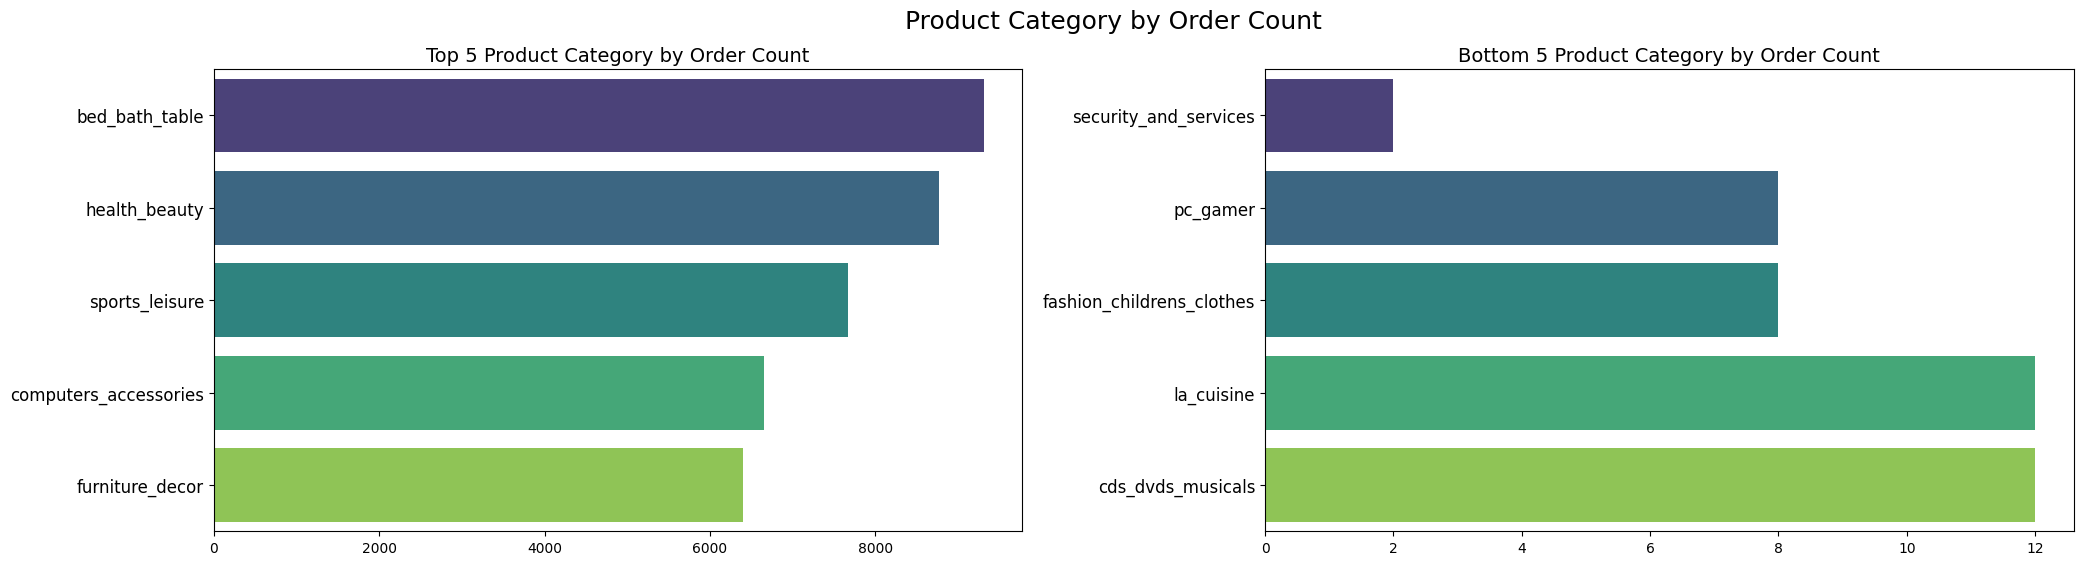

In [89]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(24,6))
colors = sns.color_palette("viridis", len(sum_order_items_df.head(5)))

sns.barplot(x='order_id',y='product_category_name',data=sum_order_items_df.head(5),ax=ax[0], palette=colors)
ax[0].set_title('Top 5 Product Category by Order Count',fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='order_id',y='product_category_name',data=sum_order_items_df.sort_values(by='order_id', ascending=True).head(5),ax=ax[1], palette=colors)
ax[1].set_title('Bottom 5 Product Category by Order Count',fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='y', labelsize=12)

plt.subplots_adjust(wspace=0.3)  
plt.suptitle('Product Category by Order Count',fontsize=18)
plt.show()

2. Produk apa yang memiliki rating terbaik dan terburuk?

In [90]:
mean_review_score_df=final_df.groupby(by='product_category_name').review_score.mean().sort_values(ascending=False).reset_index()
mean_review_score_df.head(10)

,product_category_name,review_score
0,cds_dvds_musicals,4.666667
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.442991
3,books_imported,4.409836
4,food_drink,4.401674
5,costruction_tools_tools,4.395833
6,flowers,4.392857
7,books_technical,4.376426
8,la_cuisine,4.357143
9,luggage_accessories,4.339500


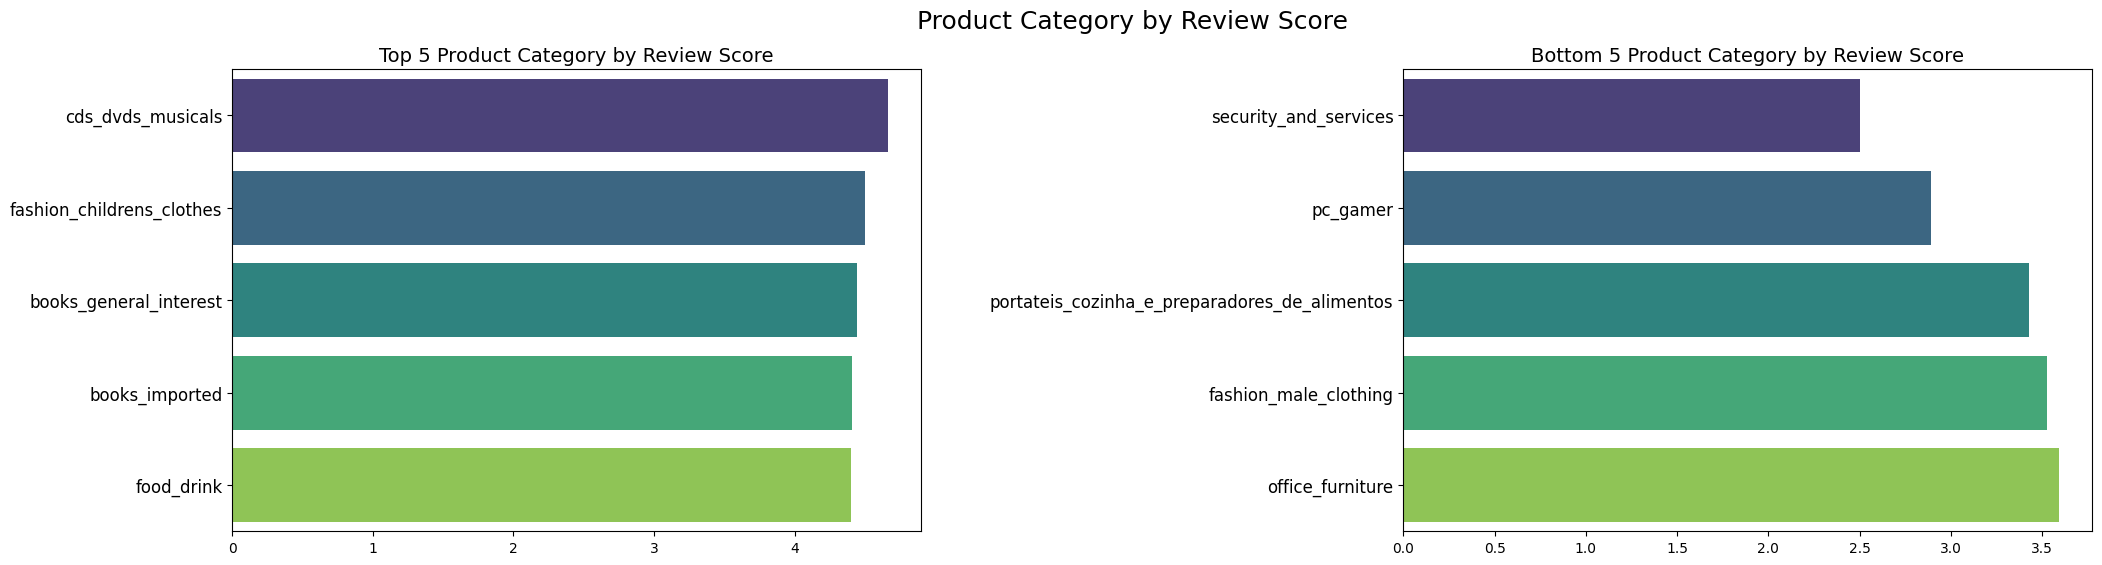

In [91]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(24,6))
colors = sns.color_palette("viridis", len(mean_review_score_df.head(5)))

sns.barplot(x='review_score',y='product_category_name',data=mean_review_score_df.head(5),ax=ax[0], palette=colors)
ax[0].set_title('Top 5 Product Category by Review Score',fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='review_score',y='product_category_name',data=mean_review_score_df.sort_values(by='review_score', ascending=True).head(5),ax=ax[1], palette=colors)
ax[1].set_title('Bottom 5 Product Category by Review Score',fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='y', labelsize=12)

plt.subplots_adjust(wspace=0.7)  
plt.suptitle('Product Category by Review Score',fontsize=18)
plt.show()

3. Apa metode pembayaran yang sering digunakan oleh customer?

In [92]:
sum_payment_type_df=final_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).reset_index()
sum_payment_type_df.head()

,payment_type,order_id
0,credit_card,74340
1,boleto,19209
2,voucher,3674
3,debit_card,1487


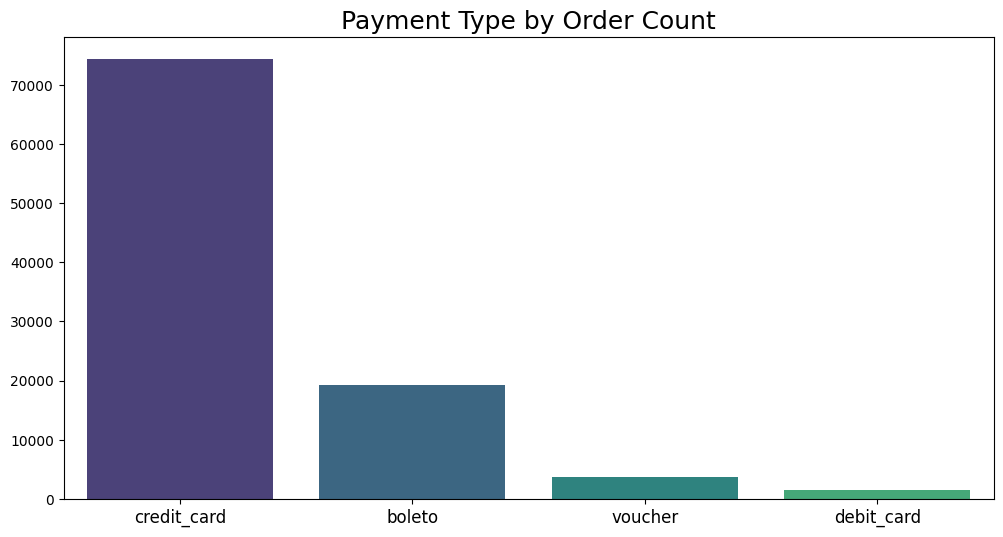

In [93]:
plt.figure(figsize=(12,6))

sns.barplot(
    y='order_id',
    x='payment_type',
    data=sum_payment_type_df.sort_values(by='order_id', ascending=False),
    palette=colors
)

plt.title('Payment Type by Order Count',fontsize=18,loc='center')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

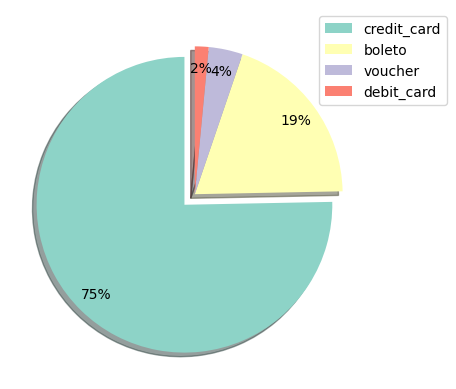

In [94]:
colors = sns.color_palette("Set3", 4)

explode = (0.1, 0, 0, 0)

plt.pie(
    x=sum_payment_type_df['order_id'],
    autopct='%.0f%%',
    pctdistance=0.85,
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=90
)
plt.legend(sum_payment_type_df['payment_type'], loc='upper right',bbox_to_anchor=(1.2, 1))
plt.show()

In [95]:
daily_order_df=final_df.resample(rule='D',on='order_date').agg({
    'order_id':'nunique',
    'price':'sum',
})
daily_order_df.index=daily_order_df.index.strftime('%Y-%m-%d')
daily_order_df=daily_order_df.reset_index()
daily_order_df.rename(columns={'order_id':'order_count', 'price':'revenue'},inplace=True)
daily_order_df.head()

,order_date,order_count,revenue
0,2016-09-04,1,72.89
1,2016-09-05,1,59.50
2,2016-09-06,0,0.00
3,2016-09-07,0,0.00
4,2016-09-08,0,0.00


# Conclusion

1. Kategori produk yang paling sering dibeli adalah bed_bath_table dan yang paling jarang dibeli adalah security_and_services
2. Produk yang mendapatkan rata-rate rating tertinggi adalah cds_dvds_musical dan yang terendah adalah security_and_services
3. Metode pembayaran yang paling sering digunakan oleh customer adalah menggunakan credit card

In [96]:
final_df.to_csv('./dashboard/final_dataset.csv', index=False)